In [64]:
import pandas
import openpyxl 
import matplotlib
# openpyxl é uma biblioteca feita para a leitura e escrita de planilhas excel

In [65]:
df1 = pandas.read_excel("datasets/Aracaju.xlsx")
df2 = pandas.read_excel("datasets/Fortaleza.xlsx")
df3 = pandas.read_excel("datasets/Natal.xlsx")
df4 = pandas.read_excel("datasets/Recife.xlsx")
df5 = pandas.read_excel("datasets/Salvador.xlsx")

# Leitura de todos os arquivos que vão ser utilizados

In [66]:
df = pandas.concat([df1,df2,df3,df4,df5])
# Concatenação de todos os arquivos


In [67]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [68]:
df.sample(5)
# Pega uma amostra dos dados da tabela, de acordo com o numero definido no ()

,Cidade,Data,Vendas,LojaID,Qtde
18,Salvador,2019-01-01,242.31,1035,1
48,Natal,2018-09-20,676.00,852,4
11,Natal,2019-02-09,564.00,853,3
57,Salvador,2019-01-01,11.72,1035,1
61,Aracaju,2018-01-01,39.80,1520,6


In [69]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [70]:
df["LojaID"] = df["LojaID"].astype("object")
# Dessa maneira conseguimos mudar o tipo do dado presente na tabela
# Passando "LojaID" de int para object

In [71]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [72]:
df.isnull().sum()
# Dessa maneira verificamos o número de valores nulos das colunas

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [73]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)
# "fillna" substitui pelo valor que definirmos
# Dessa maneira, caso tenha valores nulos na tabela, os modificamos pela media
# "inplace = True" modifica o valor dentro da memoria, no caso, modifica diretamente na tabela

In [74]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [75]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde
23,Natal,2019-02-14,304.00,854,3
112,Natal,2019-01-02,43.00,1036,3
25,Natal,2019-01-13,611.00,852,2
123,Natal,2019-01-02,127.45,1036,3
62,Salvador,2019-01-01,161.02,1037,3
4,Aracaju,2018-01-01,24.51,1522,8
36,Natal,2019-02-09,328.00,853,2
148,Natal,2019-01-02,40.59,1037,3
67,Recife,2019-01-01,179.52,983,5
41,Aracaju,2018-01-01,229.64,1520,8


In [76]:
df["Vendas"].mean()

122.61180089485458

In [77]:
df["Vendas"].fillna(0,inplace = True)
# Dessa maneira substituimos todos os valores dessa coluna para 0 

In [78]:
df.dropna(inplace = True)
# Dessa maneira apagamos as linhas com valores nulos

In [79]:
df.dropna(subset=["Vendas"], inplace = True)
# Dessa maneira consegue-se apagar os valores nulos apenas da coluna definida no "subset"

In [80]:
df.dropna(how="all",inplace = True)
#Com o parametro "how=all" conseguimos apagar todas as linhas, em todas as colunas, que possuem valores faltantes

In [81]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])
# .mul é a função de multiplicação
# Assim criamos uma nova coluna, "Receita", que possui em suas linhas o valor da multiplicação de vendas com quantidade

In [82]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [83]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
# Caso não se tivesse o valor da coluna "Qtde", conseguiriamos encontralo dessa maneira, fazendo a multiplicação

In [84]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [85]:
df["Receita"].max()
# Assim se encontra o maior valor da coluna definida

3544.0

In [86]:
df["Receita"].min()
# Encontrando o valor minimo da

3.34

In [87]:
df.nlargest(3,"Receita")
# o .nlargest retorna os maiores valores do que foi definido
# Assim, ele retorna as 3 linhas com maiores valores baseado na coluna "Receita"

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [88]:
df.nsmallest(3,"Receita")
# Assim retornamos as 3 linhas com os menos valores de "Receita"

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [89]:
df.groupby("Cidade")["Receita"].sum()
# Assim agrupamos as cidades pela soma dos valores presentes na coluna "Receita"

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [90]:
df.sort_values("Receita", ascending = False).head(20)
# Assim conseguimos ordenar o conjunto de dados, baseado na coluna "Receita"
# "ascending = False" ordena de maneira decrescente

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [91]:
df["Data"] = df["Data"].astype("int64")
# Conversão do tipo de data para int

In [92]:
df["Data"] = pandas.to_datetime(df["Data"])
# Conversão do tipo de data para o tipo datetima
# Recomendado fazer esse tipo de conversão para datas

In [93]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [94]:
df.groupby(df["Data"].dt.year)["Receita"].sum()
# Agrupamento dos anos na coluna data
# Dessa maneira agrupamos apenas o valor da soma da receita por ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [95]:
df["Ano_Venda"] = df["Data"].dt.year
# Dessa maneira criamos uma nova coluna "Ano_venda" com base no ano que esta presente na coluna data

In [96]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018
23,Natal,2019-02-14,304.00,854,3,912.00,3.0,2019
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0,2019
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,3.0,2019


In [97]:
df["Mes_venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)
# Criando novas colunas com base 

In [98]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda
238,Natal,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019,1,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2
88,Natal,2019-01-02,31.20,1036,1,31.20,1.0,2019,1,2
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2.0,2019,1,1


In [99]:
df["Data"].min()
# Menor valor de data

Timestamp('2018-01-01 00:00:00')

In [100]:
df["Diferenca_dias"] = df["Data"] - df["Data"].min()
# Dessa maneira pegamos a data daquela coluna e calculamos a diferença pelo valor da data minima

In [101]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda,Diferenca_dias
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30,453 days
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2.0,2018,1,1,0 days
89,Natal,2019-01-02,17.46,1034,1,17.46,1.0,2019,1,2,366 days
119,Aracaju,2018-01-01,9.32,1523,6,55.92,6.0,2018,1,1,0 days
138,Natal,2019-01-02,212.03,1037,3,636.09,3.0,2019,1,2,366 days


In [102]:
df["Trimestre_Venda"] = df["Data"].dt.quarter
# ".quarter" retorna o trimestre da coluna definida

In [103]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
68,Recife,2019-01-01,175.45,980,3,526.35,3.0,2019,1,1,365 days,1
40,Aracaju,2018-01-01,6.99,1522,7,48.93,7.0,2018,1,1,0 days,1
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,1.0,2019,1,1,365 days,1
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,1.0,2019,1,1,365 days,1
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019,1,1,365 days,1


In [104]:
Vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
# Dessa maneira fazemos uma filtragem das vendas que ocorrem em 2019 e apenas no mês de março

In [105]:
Vendas_marco_19.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
116,Recife,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1


In [106]:
df["LojaID"].value_counts(ascending=False)
# Faz a contagem do numero de linhas por loja id

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

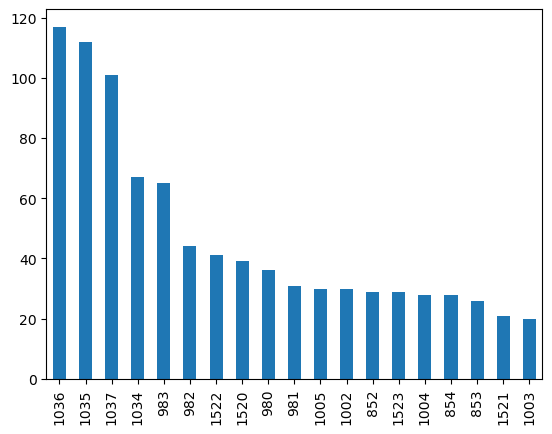

In [107]:
df["LojaID"].value_counts(ascending=False).plot.bar()
# Alguns comandos da matplotlib já estão integrados ao pandas